In [6]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Description of Variables

 **Variable name** | **Description**                                                                                                                                                                            
:-------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 pop               | NOT USED                                                                                                                                                                                          
 logpop            | NOT USED                                                                                                                                                                                          
 nbHF              | NOT USED                                                                                                                                                                                          
 adjpop            | NOT USED                                                                                                                                                                                          
 longitude         | Longitude, is a geographic coordinate that specifies the east–west position of a point on the Earth's surface, or the surface of a celestial body\. UNIT: Degrees                          
 latitude          | Latitude, is a geographic coordinate that specifies the north–south position of a point on the Earth's surface\. UNIT: Degrees                                                             
 sampling          | Whether or not was made a sample. Use this variable only for me to go through data and fill total_cases with logical values (Himalyas Example = 0 total_cases). Write an assumption in the thesis about this.                                                                                                                                                                                        
 total\_cases      | Number of total COVID\-19 cases for a given Longitude and Latitude\. UNIT: Number of cases                                                                                                 
 adj\_cases\*      | Number of COVID\-19 cases per 100,000 population for a given Longitude and Latitude\. It is calculated by \(total\_cases/adjpop\)\*100000\. UNIT: Number of cases per 100,000 population\. 
 Waccess            | Traveltime to Wuhan. (Higher means far from Wuhan, and low near to Wuhan)(Social Covariate)                                                                                                                                                                                         
 access             | This covariate indicates how near people are to cities measured by traveltime \(Accessibility to cities >50,000 people\) (Weiss 2018) (Social Covariate)                                                                                   
 elevation         | NOT USED                                                                                                                      
 aridity           | NOT USED
 irrigation        | NOT USED                                                                                                                                                                                          
 lst               | NOT USED Land-Surface Temperature (January). Satelite Data (!IMPORTANT). (Natural Covariate)                                                                                                                                                                                         
 pet               | Potential evapotranspiration (Something with humidity). MODIS Satelite Data (Natural Covariate)                                                                                                                                              
 pop\.1            | Sum of population at pixel-level (STANDARDIZED) (Social Covariate)                                                                                                                                                                                          
 urban             | Proportion of ubran in each pixel (Higher means high proportion of urban land - very ) (Social Covariate).                                                                              



# Load data

In [6]:
# save all different datas in the "data" dictionary
data = {}
data["all"] = pd.read_csv("../../data/csvs/data.csv", index_col="index")
data["train"] = pd.read_csv("../../data/csvs/split/train.csv", index_col="index")
data["validation"] = pd.read_csv("../../data/csvs/split/validation.csv", index_col="index")
data["test"] = pd.read_csv("../../data/csvs/split/test.csv", index_col="index")

In [7]:
data["all"].describe()

,longitude,latitude,access,pet,pop,urban,W_access,adj_cases
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,108.876944,32.965877,-0.622909,0.033685,0.949638,0.917807,-0.518920,2.293977
std,11.863252,6.241687,1.399624,0.655489,1.391114,1.147988,1.122475,7.067644
min,78.270833,18.291870,-3.487341,-2.363020,-1.974678,-0.482502,-3.676348,0.000000
25%,104.984800,29.050435,-1.576518,-0.408445,0.352628,-0.482502,-1.188745,0.140595
50%,111.572700,33.436710,-0.883368,0.114834,1.067258,0.983505,-0.800532,0.497871
75%,117.293800,36.409282,-0.153806,0.483794,1.851361,1.684877,-0.160515,1.449808
max,132.546400,49.717850,3.444752,2.789949,4.630500,4.335167,2.691532,131.926332


In [8]:
data["train"].describe()

,longitude,latitude,access,pet,pop,urban,W_access,adj_cases
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,108.837794,33.070114,-0.614838,0.021414,0.940790,0.916743,-0.506130,2.230415
std,11.981972,6.247987,1.410351,0.668321,1.383413,1.148650,1.095439,7.867399
min,78.270833,18.291870,-3.487341,-2.363020,-1.974678,-0.482502,-3.676348,0.000000
25%,105.056500,28.697300,-1.581374,-0.412116,0.329067,-0.482502,-1.161913,0.139569
50%,111.362600,33.270833,-0.848071,0.112708,1.027002,0.956714,-0.786357,0.506065
75%,117.224844,36.454840,-0.136734,0.497390,1.809566,1.667885,-0.214856,1.416457
max,132.546400,49.281860,3.444752,2.789949,4.630500,4.285826,2.691532,131.926332


In [9]:
data["validation"].describe()

,longitude,latitude,access,pet,pop,urban,W_access,adj_cases
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,109.623965,32.873224,-0.696157,0.063322,1.029015,0.981973,-0.552267,2.428266
std,11.041373,6.548817,1.353946,0.624483,1.403718,1.130084,1.102247,5.796444
min,82.020833,18.594640,-3.085057,-2.092401,-1.974678,-0.482502,-2.999472,0.000000
25%,106.110700,29.309255,-1.581157,-0.305511,0.497047,-0.482502,-1.212322,0.148739
50%,112.032300,33.895833,-0.913176,0.194353,1.203674,1.035829,-0.833404,0.508551
75%,117.504400,36.377512,-0.338152,0.476485,1.962960,1.759181,-0.219936,1.591885
max,127.680400,49.717850,2.581888,1.268342,4.484875,3.792246,2.670783,38.558924


In [10]:
data["test"].describe()

,longitude,latitude,access,pet,pop,urban,W_access,adj_cases
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,108.247372,32.745816,-0.573876,0.040860,0.896801,0.856834,-0.523941,2.350376
std,12.328522,5.936045,1.418696,0.650117,1.407650,1.168009,1.225268,5.564024
min,81.395833,18.390840,-3.077173,-1.809758,-1.974678,-0.482502,-2.839588,0.000000
25%,103.518950,29.582645,-1.560054,-0.423065,0.335608,-0.482502,-1.282488,0.143853
50%,111.624700,33.270833,-0.883368,0.099768,1.057355,0.926667,-0.824623,0.483680
75%,117.028800,36.395833,-0.070773,0.480171,1.784480,1.632240,0.073721,1.572767
max,129.457900,49.096510,3.166352,1.200021,4.285423,4.335167,2.674515,42.815878


# Plot and explore each variable

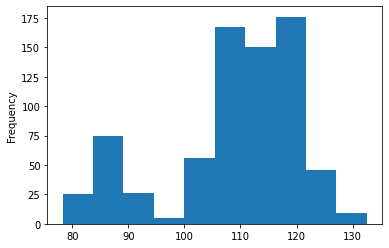

In [11]:
data["all"]["longitude"].plot.hist()

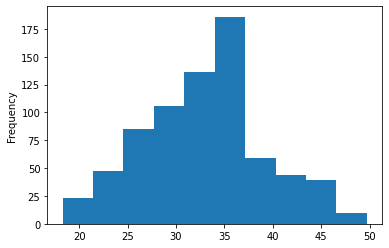

In [12]:
data["all"]["latitude"].plot.hist()

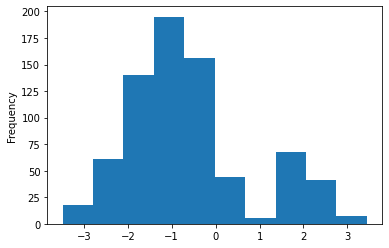

In [13]:
data["all"]["access"].plot.hist()

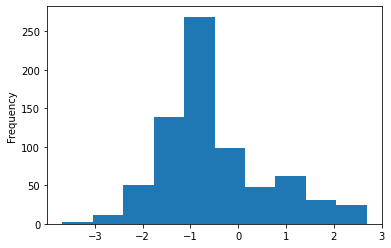

In [14]:
data["all"]["W_access"].plot.hist()

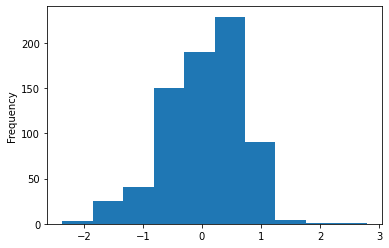

In [15]:
data["all"]["pet"].plot.hist()

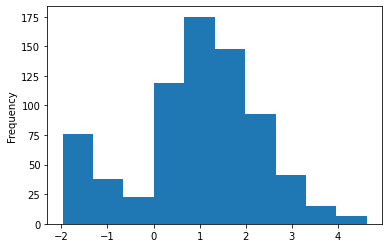

In [16]:
data["all"]["pop"].plot.hist()

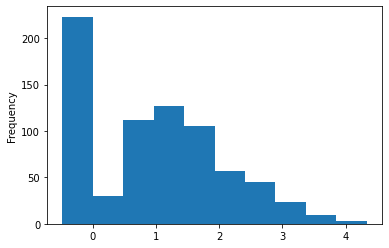

In [17]:
data["all"]["urban"].plot.hist()

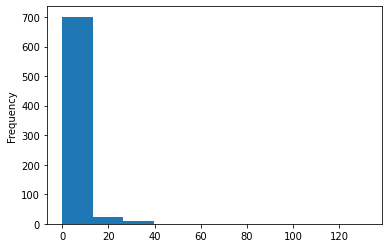

In [18]:
data["all"]["adj_cases"].plot.hist()

# Standardise and normalise data

In [19]:
data_scaled = data["all"].copy()

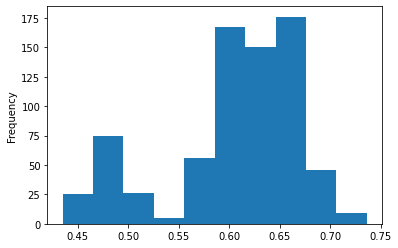

In [20]:
data_scaled["longitude"] = data["all"]["longitude"] / 180
data_scaled["longitude"].plot.hist()

Using matplotlib backend: MacOSX


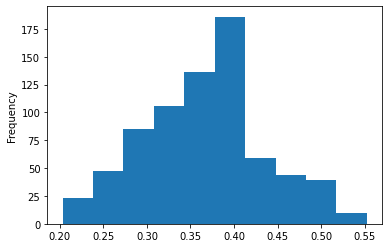

In [21]:
data_scaled["latitude"] = data["all"]["latitude"] / 90
data_scaled["latitude"].plot.hist()

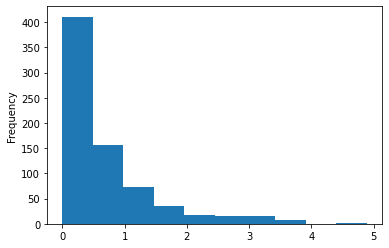

In [22]:
data_scaled["adj_cases"] = np.log(data["all"]["adj_cases"] + 1)
data_scaled["adj_cases"].plot.hist()